# Bike Sharing Assignment

## Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In [1]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\shrikant\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# setting the style for seaborn plots
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read input dataset
boombikes = pd.read_csv('day.csv')

In [4]:
# display head
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check shape
boombikes.shape

(730, 16)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
 # missing values percentage
round(100*(boombikes.isnull().sum()/len(boombikes)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [8]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# drop instant and dteday since they dont have significance with data
boombikes.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# create meaningful categorical data using map 
boombikes['season'] = boombikes['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
boombikes['mnth'] = boombikes['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
boombikes['weekday'] = boombikes['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
boombikes['weathersit'] = boombikes['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})

boombikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


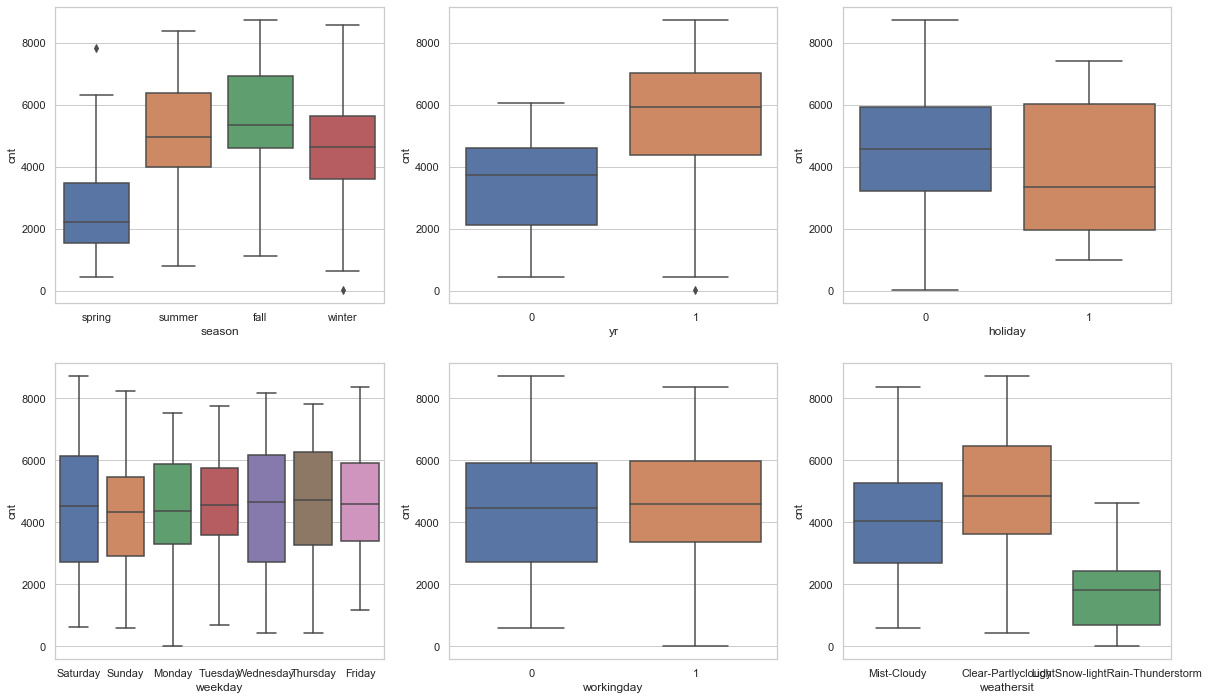

In [12]:
# function to display categorical value in boxplots
def displayBoxplot(cat_var,target):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = boombikes)
    plt.show()

cat_var =['season','yr','holiday','weekday','workingday','weathersit']
displayBoxplot(cat_var,'cnt')

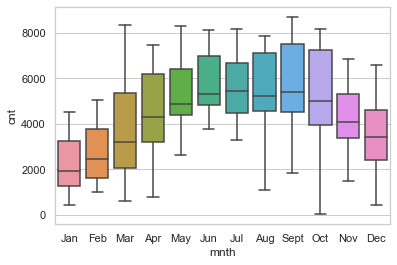

In [13]:
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.show()

In [14]:
# function to create get dummies for categorical data
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

boombikes = dummies('season',boombikes)
boombikes = dummies('mnth',boombikes)
boombikes = dummies('weekday',boombikes)
boombikes = dummies('weathersit',boombikes)
boombikes.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
boombikes.shape

(730, 30)

In [16]:
boombikes.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:

np.random.seed(0)
# split train test data train_size = 70%
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)


In [18]:
# shape of train data
df_train.shape

(510, 30)

In [19]:
# shape of test data
df_test.shape

(219, 30)

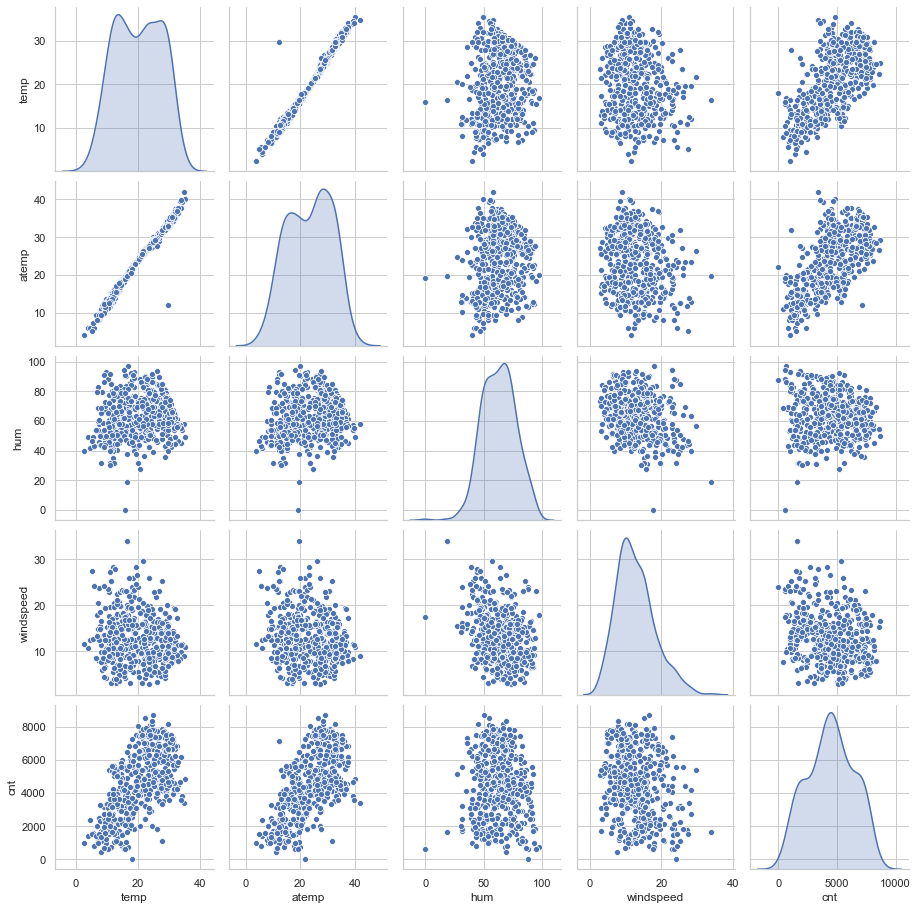

In [20]:
# pairplot to check correlation between different features with target variable
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

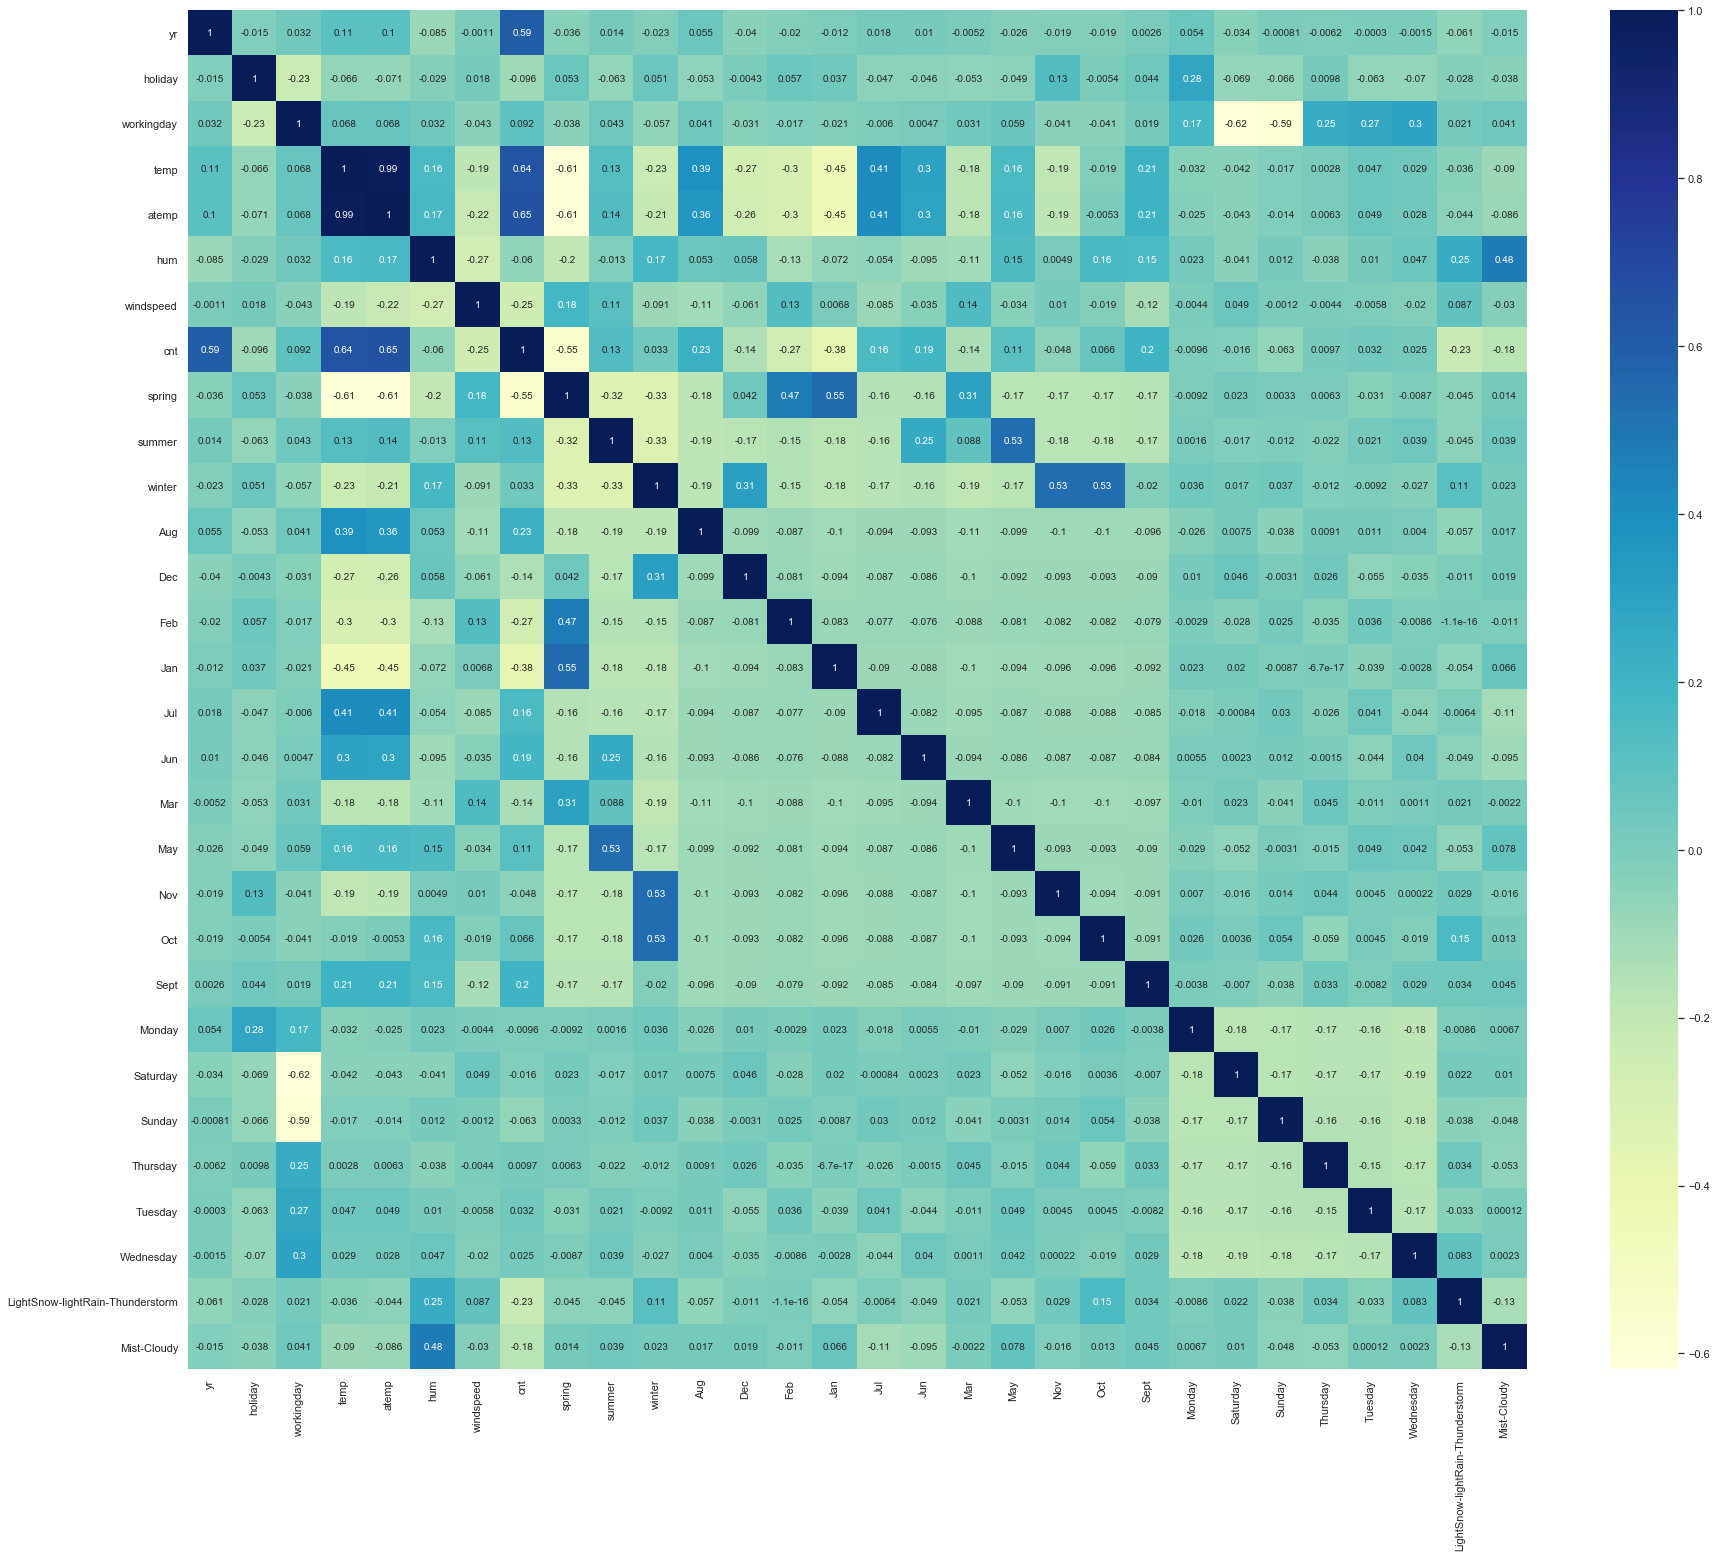

In [21]:
# Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Scale the data using scaler() to all the columns except categorical variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
# use Linear Regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 13),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', False, 12),
 ('Feb', False, 9),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 6),
 ('May', False, 5),
 ('Nov', False, 10),
 ('Oct', False, 2),
 ('Sept', True, 1),
 ('Monday', False, 14),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('LightSnow-lightRain-Thunderstorm', True, 1),
 ('Mist-Cloudy', True, 1)]

In [28]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sept', 'Saturday', 'Sunday',
       'LightSnow-lightRain-Thunderstorm', 'Mist-Cloudy'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [30]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jul,Sept,Saturday,Sunday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


In [31]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# function to return VIF
def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [32]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.13e-191
Time:                        16:09:07   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [33]:
calculateVIF(X_train_new)

,Features,VIF
2,holiday,inf
3,workingday,inf
12,Saturday,inf
13,Sunday,inf
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
15,Mist-Cloudy,1.57


#### 2

In [34]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.13e-191
Time:                        16:09:07   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [35]:
# Calculate the Variance Inflation Factor
calculateVIF(X_train_new)

,Features,VIF
2,holiday,inf
3,workingday,inf
12,Saturday,inf
13,Sunday,inf
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
15,Mist-Cloudy,1.57


In [36]:
X_train_new=X_train_new.drop(["holiday"], axis = 1)

#### 3

In [37]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.13e-191
Time:                        16:09:07   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [38]:
# Calculate the Variance Inflation Factor
calculateVIF(X_train_new)

,Features,VIF
0,const,114.08
2,workingday,9.07
11,Saturday,6.06
12,Sunday,5.74
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
14,Mist-Cloudy,1.57


In [39]:
# spring has high VIF so we'll drop
X_train_new=X_train_new.drop(["spring"], axis = 1)

#### 4

In [40]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          2.77e-191
Time:                        16:09:07   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [41]:
# Calculate the Variance Inflation Factor
calculateVIF(X_train_new)

,Features,VIF
0,const,82.58
2,workingday,9.06
10,Saturday,6.05
11,Sunday,5.73
4,hum,1.89
3,temp,1.60
13,Mist-Cloudy,1.56
8,Jul,1.43
6,summer,1.33
7,winter,1.29


In [42]:
# July has high P value so drop it
X_train_new=X_train_new.drop(["Jul"], axis = 1)

#### 5

In [43]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          4.55e-191
Time:                        16:09:07   Log-Likelihood:                 510.83
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     497   BIC:                            -940.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [44]:
# Calculate Variance Inflation Factor
calculateVIF(X_train_new)

,Features,VIF
0,const,82.57
2,workingday,9.06
9,Saturday,6.05
10,Sunday,5.73
4,hum,1.87
12,Mist-Cloudy,1.56
3,temp,1.27
7,winter,1.25
11,LightSnow-lightRain-Thunderstorm,1.24
6,summer,1.19


#### Now VIF is less than 2, so we go ahead with other variables

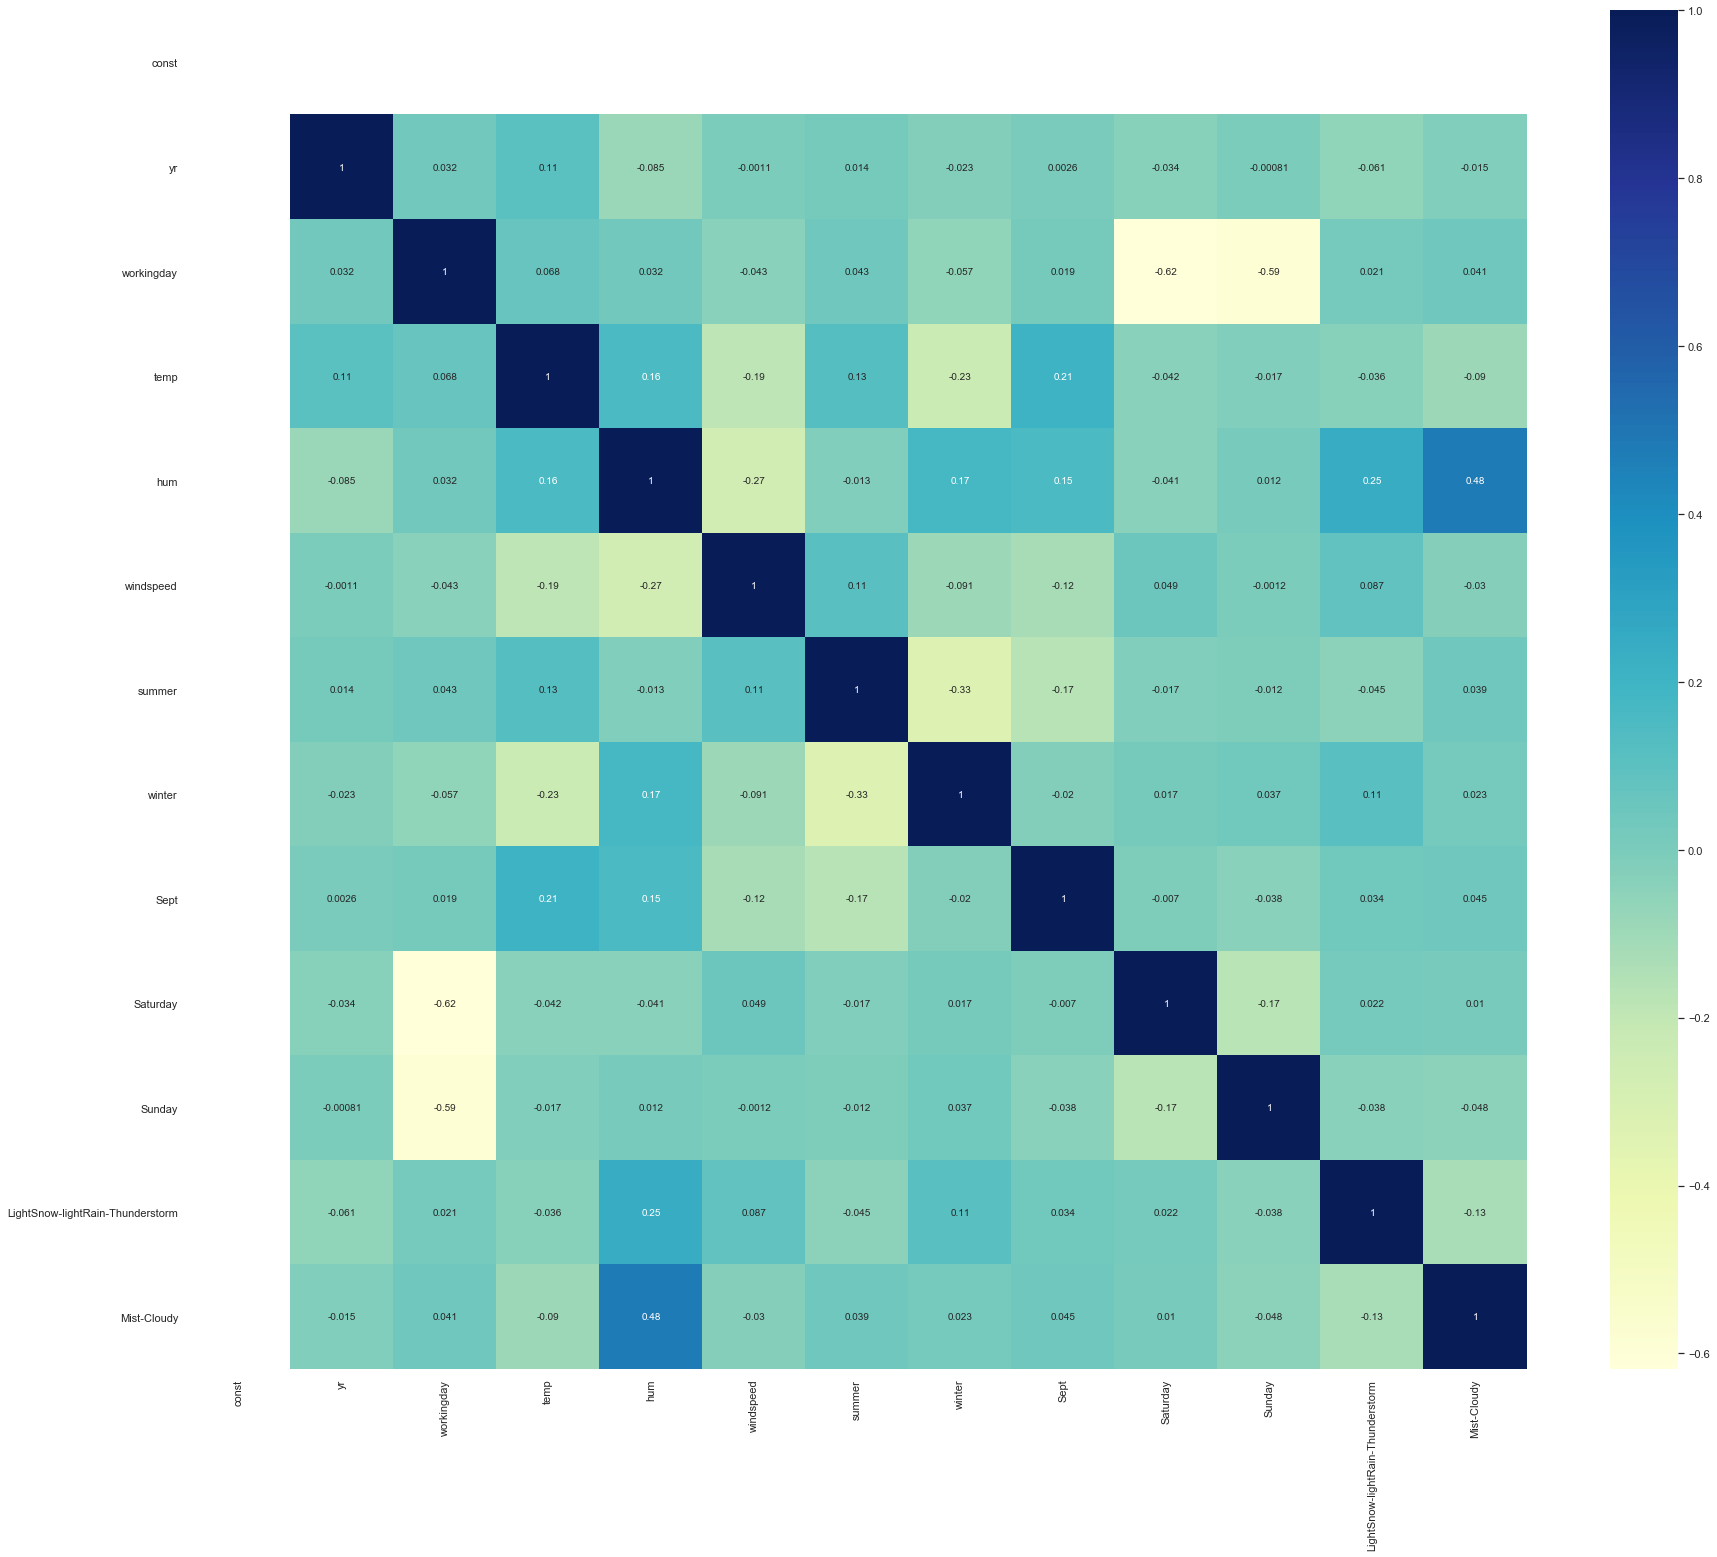

In [45]:
# heatmap to check corr
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### workingday & saturday have high negative corr value 

In [46]:
X_train_new=X_train_new.drop(["workingday"], axis = 1)

#### 6

In [47]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          8.66e-189
Time:                        16:09:09   Log-Likelihood:                 502.59
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     498   BIC:                            -930.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [48]:
X_train_new=X_train_new.drop(["Saturday"], axis = 1)

#### 7

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.2
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.04e-189
Time:                        16:09:09   Log-Likelihood:                 501.89
No. Observations:                 510   AIC:                            -981.8
Df Residuals:                     499   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [50]:
# Calculate the Variance Inflation Factor
calculateVIF(X_train_new)

,Features,VIF
0,const,44.92
3,hum,1.87
10,Mist-Cloudy,1.56
2,temp,1.27
6,winter,1.25
9,LightSnow-lightRain-Thunderstorm,1.24
5,summer,1.19
4,windspeed,1.18
7,Sept,1.11
1,yr,1.03


#### Inferences
* VIF is less than 2
* P-values 0

#### Residual Analysis

In [51]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_cnt= lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

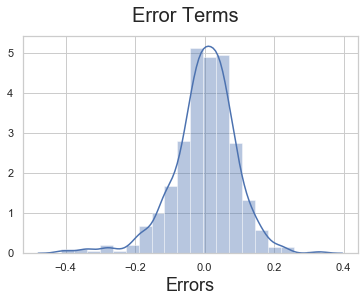

In [52]:
# histogram
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [53]:
# scale test dataset
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
y_pred = lm.predict(X_test_new)

In [57]:
r2=r2_score(y_test, y_pred)
print(r2)

0.8025061064992782


In [58]:
X_test_new.shape

(219, 11)

In [59]:
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7920112619171142

Text(0, 0.5, 'y_pred')

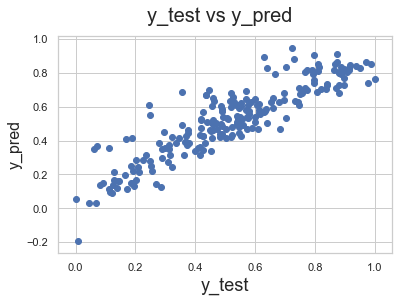

In [60]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.2
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.04e-189
Time:                        16:09:10   Log-Likelihood:                 501.89
No. Observations:                 510   AIC:                            -981.8
Df Residuals:                     499   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### The best fitted line:
cnt= 0.2231+0.2293 yr+0.5737 temp-0.1660 hum-0.1871 windspeed+0.0906 summer+0.1400 winter+0.1013 sept-0.2389 LightSnow-lightRain-Thunderstorm-0.0531 *Mist-Cloudy

### The company should focus on the below features
* year: company should wait for pandemic to get over and things become normal
* season: company should focus on Summer & Fall
* weather: Users prefer the bikes when the weather is pleasant
* temp: Users prefer bikes when the temperature is moderate